In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
df_spend = pd.read_csv('000_Card_Spending.csv', encoding='utf-8')
df_card = pd.read_csv('000_Card_Data.csv', encoding='utf-8')
df_tel = pd.read_csv('000_Telemarketing_Data.csv', encoding='utf-8')

In [12]:
df_tel.isnull().sum()

연령              0
직업군             0
결혼여부            0
학력              0
신용카드소지여부        0
주택대출여부          0
개인대출여부          0
contact         0
통화시간            0
연락시도횟수          0
p_days      39673
과거통화횟수          0
계약여부            0
연락일자            0
카드종류            0
dtype: int64

In [13]:
display(df_tel['연령'].value_counts().sort_index(), df_tel['직업군'].value_counts().sort_index(), df_tel['결혼여부'].value_counts().sort_index(), df_tel['학력'].value_counts().sort_index(), df_tel['신용카드소지여부'].value_counts().sort_index(), df_tel['주택대출여부'].value_counts().sort_index(), df_tel['개인대출여부'].value_counts().sort_index(), df_tel['contact'].value_counts().sort_index(), df_tel['통화시간'].value_counts().sort_index(), df_tel['연락시도횟수'].value_counts().sort_index(), df_tel['p_days'].value_counts().sort_index(), df_tel['과거통화횟수'].value_counts().sort_index(), df_tel['계약여부'].value_counts().sort_index(), df_tel['연락일자'].value_counts().sort_index(), df_tel['카드종류'].value_counts().sort_index())

17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: 연령, Length: 78, dtype: int64

공무원        2924
기술자        6743
기업가        1456
미취업자       1014
미확인         330
산업노동자      9254
서비스종사자     3969
은퇴         1720
자영업자       1421
주부         1060
학생          875
회사원       10422
Name: 직업군, dtype: int64

결혼     24928
미혼     11568
미확인       80
이혼      4612
Name: 결혼여부, dtype: int64

검정고시     2292
고졸       6045
대졸학사    12168
문맹         18
미확인      1731
석박사      5243
전문학교     9515
중졸       4176
Name: 학력, dtype: int64

미확인     8597
없음     32588
있음         3
Name: 신용카드소지여부, dtype: int64

대출있음    21576
미확인       990
없음      18622
Name: 주택대출여부, dtype: int64

대출있음     6248
미확인       990
없음      33950
Name: 개인대출여부, dtype: int64

유선전화    15044
휴대폰     26144
Name: contact, dtype: int64

0        4
1        3
2        1
3        3
4       12
        ..
3631     1
3643     1
3785     1
4199     1
4918     1
Name: 통화시간, Length: 1544, dtype: int64

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: 연락시도횟수, dtype: int64

0.0      15
1.0      26
2.0      61
3.0     439
4.0     118
5.0      46
6.0     412
7.0      60
8.0      18
9.0      64
10.0     52
11.0     28
12.0     58
13.0     36
14.0     20
15.0     24
16.0     11
17.0      8
18.0      7
19.0      3
20.0      1
21.0      2
22.0      3
25.0      1
26.0      1
27.0      1
Name: p_days, dtype: int64

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: 과거통화횟수, dtype: int64

no     36548
yes     4640
Name: 계약여부, dtype: int64

2018-01-01     40
2018-01-02     75
2018-01-03    107
2018-01-04     93
2018-01-05    127
             ... 
2019-02-24     86
2019-02-25     89
2019-02-26    114
2019-02-27     93
2019-02-28    131
Name: 연락일자, Length: 424, dtype: int64

87     293
88     293
89     293
90     293
91     293
      ... 
223    292
224    292
225    292
226    292
227    292
Name: 카드종류, Length: 141, dtype: int64

In [14]:
# df_tel[(df_tel['연령'] < 19) & (df_tel['계약여부'] == 'yes')]

In [15]:
df_tel['p_days'].fillna('안함', inplace=True)
df_tel['재연락'] = np.where(df_tel['p_days'] == '안함', 0, 1)

<AxesSubplot:xlabel='재연락', ylabel='count'>

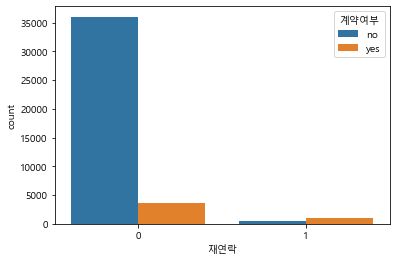

In [16]:
sns.countplot('재연락', data=df_tel, hue='계약여부')

In [17]:
df_tel[df_tel['재연락'] == 1]['계약여부'].value_counts()

yes    967
no     548
Name: 계약여부, dtype: int64

In [18]:
df_tel[df_tel['재연락'] == 0]['계약여부'].value_counts()

no     36000
yes     3673
Name: 계약여부, dtype: int64

In [19]:
df_tel[df_tel['통화시간'] > 1000]['계약여부'].value_counts()

yes    566
no     390
Name: 계약여부, dtype: int64

In [20]:
df_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,재연락
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,안함,0,no,2018-01-03,87,0
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,안함,0,no,2018-01-03,88,0
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,안함,0,no,2018-01-03,89,0
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,안함,0,no,2018-01-03,90,0
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,안함,0,no,2018-01-03,91,0


In [21]:
plt.figure(figsize=(10,5))
# plt.title("일자별 계약여부", fontsize=15)
# df_tel.groupby('연락일자').
# plt.axhline(y= df_tel['연락시도횟수'].mean(), linestyle='--', color='red', label="mean")
# plt.grid()
# plt.legend(fontsize=13)
# plt.xticks(rotation=90)
# plt.show()

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [22]:
df_tel.groupby('연락일자').count()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,재연락
연락일자,,,,,,,,,,,,,,,
2018-01-01,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
2018-01-02,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
2018-01-03,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
2018-01-04,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
2018-01-05,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2019-02-25,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
2019-02-26,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114


In [23]:
df_tel['통화시간_2'] = np.where(df_tel['통화시간'] < df_tel['통화시간'].mean(), 0, 1)

In [24]:
call_result = pd.crosstab(df_tel.통화시간_2, df_tel.계약여부)
display(call_result)

계약여부,no,yes
통화시간_2,,
0,26324,1199
1,10224,3441


In [25]:
call_result = pd.crosstab(df_tel.통화시간_2, df_tel.계약여부)
display(call_result)

from statsmodels.formula.api import ols
import scipy.stats as stats
chi, pval, dof, expected = stats.chi2_contingency(observed = call_result)
print('chi-square test')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
print(f'귀무가설이 맞을 때 기대값 : \n {pd.DataFrame(expected)}')

계약여부,no,yes
통화시간_2,,
0,26324,1199
1,10224,3441


chi-square test
chisq : 3959.371
p : 0.000000
귀무가설이 맞을 때 기대값 : 
               0            1
0  24422.419248  3100.580752
1  12125.580752  1539.419248


In [26]:
oddsratio, pvalue = stats.fisher_exact(call_result)
print("oddratio:", oddsratio, "\n"
        "p-value:", pvalue )

oddratio: 7.389184844960785 
p-value: 0.0


In [27]:
df_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,재연락,통화시간_2
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,안함,0,no,2018-01-03,87,0,1
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,안함,0,no,2018-01-03,88,0,0
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,안함,0,no,2018-01-03,89,0,0
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,안함,0,no,2018-01-03,90,0,0
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,안함,0,no,2018-01-03,91,0,1


In [28]:
df_tel['연락일자'].value_counts()

2018-03-10    177
2018-04-21    153
2018-06-02    152
2018-03-31    151
2018-09-22    148
             ... 
2019-02-05     58
2018-09-09     55
2018-04-15     54
2018-10-15     53
2018-01-01     40
Name: 연락일자, Length: 424, dtype: int64

In [29]:
df_tel['통화시간_2'] = np.where(df_tel['통화시간'] < df_tel['통화시간'].mean(), 0, 1)

In [30]:
df_tel['개인대출여부'].value_counts()

없음      33950
대출있음     6248
미확인       990
Name: 개인대출여부, dtype: int64

In [31]:
# 대출 여부 파생 변수
loan = []
for i in range(len(df_tel)):
    if df_tel['주택대출여부'][i] == '없음' and df_tel['개인대출여부'][i] == '없음':
        loan.append(0)
    elif df_tel['주택대출여부'][i] == '대출있음' and df_tel['개인대출여부'][i] == '대출있음':
        loan.append(3)
    elif df_tel['주택대출여부'][i] == '대출있음' or df_tel['개인대출여부'][i] == '대출있음':
        loan.append(2)
    elif df_tel['주택대출여부'][i] == '미확인':
        loan.append(1)
        
df_tel['loan'] = loan

<AxesSubplot:xlabel='loan', ylabel='count'>

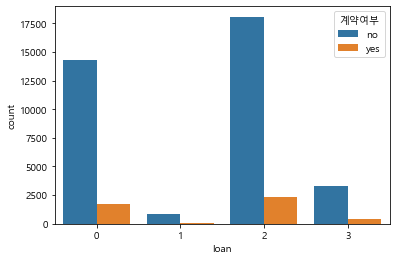

In [32]:
sns.countplot('loan', data=df_tel, hue='계약여부')

In [33]:
df_tel[(df_tel['주택대출여부'] == '있음') & (df_tel['개인대출여부'] == '미확인')]

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,재연락,통화시간_2,loan


In [34]:
df_tel[(df_tel['주택대출여부'] == '미확인') & (df_tel['개인대출여부'] == '미확인')]

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,재연락,통화시간_2,loan
29,55,미확인,결혼,대졸학사,미확인,미확인,미확인,유선전화,362,1,안함,0,no,2018-01-08,116,0,1,1
81,51,산업노동자,결혼,중졸,미확인,미확인,미확인,유선전화,212,1,안함,0,no,2018-01-21,168,0,0,1
261,27,산업노동자,미혼,검정고시,없음,미확인,미확인,유선전화,119,1,안함,0,no,2018-03-04,207,0,0,1
385,59,공무원,결혼,중졸,미확인,미확인,미확인,유선전화,437,1,안함,0,no,2018-04-01,190,0,1,1
401,48,서비스종사자,결혼,전문학교,미확인,미확인,미확인,유선전화,152,1,안함,0,no,2018-04-05,206,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,회사원,미혼,대졸학사,없음,미확인,미확인,휴대폰,192,1,3,1,yes,2018-04-25,187,1,0,1
41014,31,기술자,미혼,석박사,없음,미확인,미확인,휴대폰,212,2,안함,0,yes,2018-04-27,211,0,0,1
41015,34,회사원,이혼,대졸학사,없음,미확인,미확인,휴대폰,256,2,안함,1,no,2018-04-27,212,0,0,1
41029,46,공무원,결혼,대졸학사,없음,미확인,미확인,휴대폰,83,2,12,2,no,2018-04-30,226,1,0,1


In [35]:
loan_result = pd.crosstab(df_tel.loan, df_tel.계약여부, normalize=True)
display(loan_result)

계약여부,no,yes
loan,,
0,0.347504,0.042537
1,0.021438,0.002598
2,0.438720,0.057590
3,0.079683,0.009930


In [36]:
chi, pval, dof, expected = stats.chi2_contingency(observed = loan_result)
print('chi-square test')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
print(f'귀무가설이 맞을 때 기대값 : \n {pd.DataFrame(expected)}')

chi-square test
chisq : 0.000
p : 1.000000
귀무가설이 맞을 때 기대값 : 
           0         1
0  0.346101  0.043940
1  0.021328  0.002708
2  0.440398  0.055911
3  0.079518  0.010095


In [37]:
# df_card['옵션'].str.contains().value_counts()

In [38]:
df_spend

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
0,20180401,종로구,상계2동,종로구 상계2동,자동차정비,여성,42,3,56,82
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104
4,20180401,종로구,중계4동,종로구 중계4동,음료식품,여성,38,2,57,103
...,...,...,...,...,...,...,...,...,...,...
187517,20190228,노원구,상계10동,노원구 상계10동,서적문구,여성,30,5,56,212
187518,20190228,노원구,상계10동,노원구 상계10동,의료기관,남성,60,5,80,4
187519,20190228,노원구,상계10동,노원구 상계10동,요식업소,여성,60,9,246,163
187520,20190228,노원구,상계10동,노원구 상계10동,요식업소,남성,55,18,203,164


In [39]:
# df['SCALE'].value_counts().plot.pie(autopct='%.2f %%')

In [40]:
df_card = pd.read_csv('Card_Data_1(20210904_220136).csv', encoding='cp949')
df_card.rename(columns={'Card_ID' : '카드종류'}, inplace=True)
df_card.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
df_card.head()

,카드종류,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,0,체크카드,life,한국야쿠르트와 GS리테일의 특별한 혜택 !,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",한국야쿠르트 팝 S카드 체크,0
1,1,체크카드,life,카카오페이로 간편하게 결제하고 혜택까지 플러스,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",카카오페이 S 체크카드(무지),0
2,2,체크카드,life,속 깊은 디지털 라이프!,없음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 Deep Dream 체크,1
3,3,체크카드,life,난치병 아이들의 꿈을 이뤄주는 기부카드,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 JYP Fan’s EDM 체크,0
4,4,체크카드,life,미니언즈가 다 드림!,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",S카드 Deep Dream 체크\n(미니언즈),0


In [42]:
df_card_tel = pd.merge(df_tel, df_card, on = '카드종류')

In [43]:
df_card['연회비'].value_counts()

있음    168
없음     84
면제     11
Name: 연회비, dtype: int64

In [44]:
df_card_tel.columns

Index(['연령', '직업군', '결혼여부', '학력', '신용카드소지여부', '주택대출여부', '개인대출여부', 'contact',
       '통화시간', '연락시도횟수', 'p_days', '과거통화횟수', '계약여부', '연락일자', '카드종류', '재연락',
       '통화시간_2', 'loan', '분류', '혜택분야', '소개', '연회비', '옵션', '카드명', '가족카드여부'],
      dtype='object')

In [45]:
df_card_tel['연회비'].value_counts()

있음    41188
Name: 연회비, dtype: int64

<AxesSubplot:xlabel='가족카드여부', ylabel='count'>

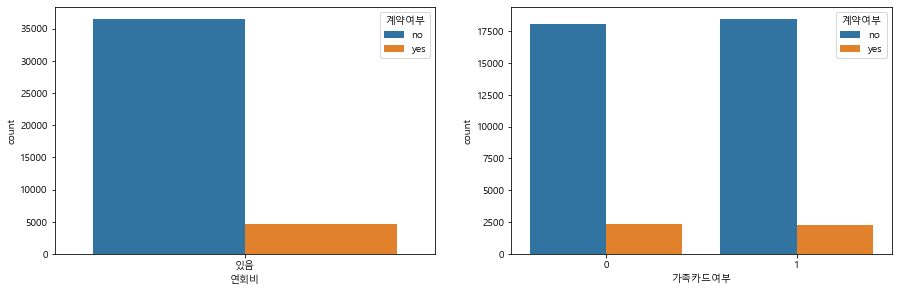

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot('연회비', data=df_card_tel, hue='계약여부')
plt.subplot(2,2,2)
sns.countplot('가족카드여부', data=df_card_tel, hue='계약여부')

<AxesSubplot:xlabel='가족카드여부', ylabel='count'>

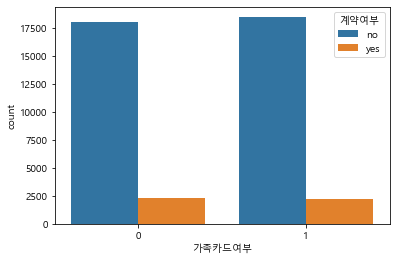

In [47]:
sns.countplot('가족카드여부', data=df_card_tel, hue='계약여부')

In [48]:
df_card_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,...,재연락,통화시간_2,loan,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,...,0,1,0,신용카드,life,"매일, 매주, 매월, 매년 나에게 찾아오는 선물",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 D-day,1
1,56,공무원,결혼,미확인,없음,대출있음,없음,유선전화,70,1,...,0,0,2,신용카드,life,"매일, 매주, 매월, 매년 나에게 찾아오는 선물",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 D-day,1
2,53,회사원,결혼,고졸,없음,없음,없음,유선전화,189,3,...,0,0,0,신용카드,life,"매일, 매주, 매월, 매년 나에게 찾아오는 선물",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 D-day,1
3,39,공무원,결혼,대졸학사,미확인,없음,없음,유선전화,496,3,...,0,1,0,신용카드,life,"매일, 매주, 매월, 매년 나에게 찾아오는 선물",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 D-day,1
4,35,회사원,이혼,대졸학사,없음,미확인,미확인,유선전화,179,1,...,0,0,1,신용카드,life,"매일, 매주, 매월, 매년 나에게 찾아오는 선물",있음,"후불교통가능, IC기능 탑재, 가족카드 가능",S카드 D-day,1


In [49]:
df_spend.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
0,20180401,종로구,상계2동,종로구 상계2동,자동차정비,여성,42,3,56,82
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104
4,20180401,종로구,중계4동,종로구 중계4동,음료식품,여성,38,2,57,103


In [50]:
df_card_tel['카드명'].value_counts()

대명 S카드 Big plus                293
S카드 Deep Making                293
S카드 Love                       293
S카드 Deep Dream                 293
S카드 Deep Taking                293
                              ... 
제주항공 Refresh Point S카드         292
S카드 Deep On Platinum+          292
S카드 아메리칸익스프레스                  292
11번가 S카드                       292
트래블보너스 Air Plus GS칼텍스 S카드 S    292
Name: 카드명, Length: 141, dtype: int64

In [51]:
df_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,재연락,통화시간_2,loan
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,안함,0,no,2018-01-03,87,0,1,0
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,안함,0,no,2018-01-03,88,0,0,0
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,안함,0,no,2018-01-03,89,0,0,2
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,안함,0,no,2018-01-03,90,0,0,0
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,안함,0,no,2018-01-03,91,0,1,2


<AxesSubplot:xlabel='혜택분야', ylabel='count'>

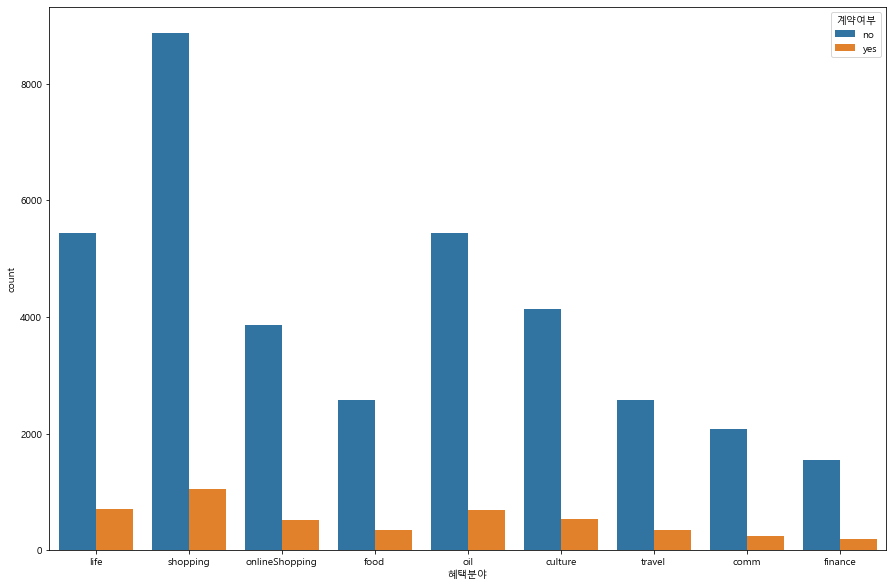

In [52]:
plt.figure(figsize=(15,10))
sns.countplot('혜택분야', data=df_card_tel, hue='계약여부')

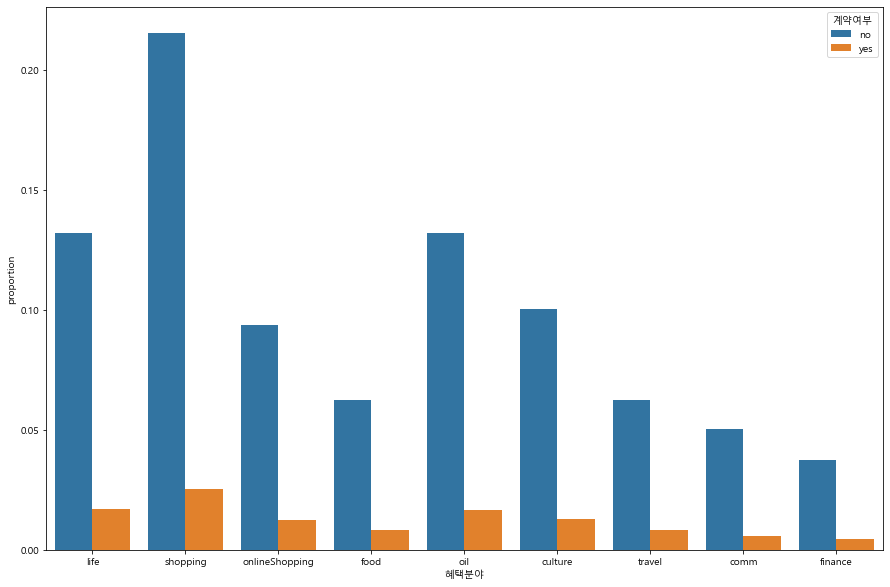

In [53]:
n_points = df_card_tel.shape[0]
max_count = df_card_tel['혜택분야'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(15,10))
# create the plot
sns.countplot(data = df_card_tel, x = '혜택분야', hue='계약여부');
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

In [54]:
df_card_tel['혜택분야'].value_counts()

shopping          9928
life              6148
oil               6132
culture           4672
onlineShopping    4380
travel            2920
food              2920
comm              2336
finance           1752
Name: 혜택분야, dtype: int64

Text(0.5, 1.0, 'finance')

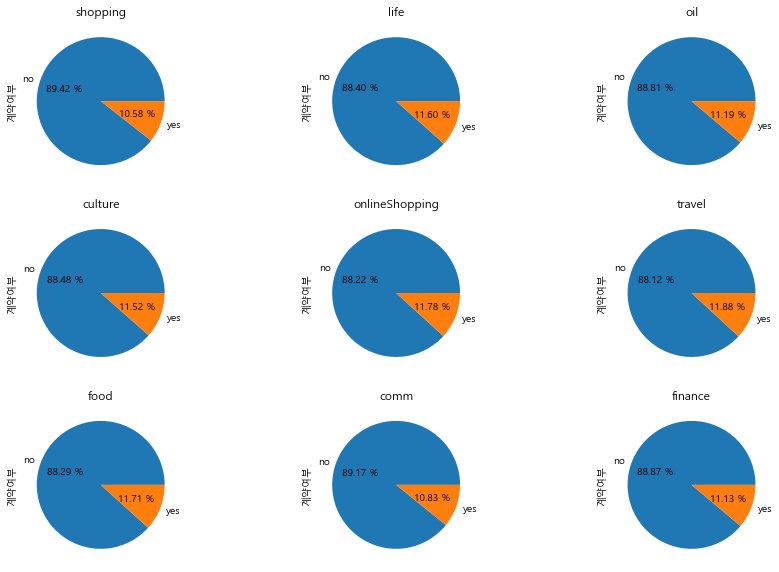

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df_card_tel[df_card_tel['혜택분야']=='shopping']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('shopping')
plt.subplot(3,3,2)
df_card_tel[df_card_tel['혜택분야']=='life']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('life')
plt.subplot(3,3,3)
df_card_tel[df_card_tel['혜택분야']=='oil']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('oil')
plt.subplot(3,3,4)
df_card_tel[df_card_tel['혜택분야']=='culture']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('culture')
plt.subplot(3,3,5)
df_card_tel[df_card_tel['혜택분야']=='onlineShopping']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('onlineShopping')
plt.subplot(3,3,6)
df_card_tel[df_card_tel['혜택분야']=='travel']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('travel')
plt.subplot(3,3,7)
df_card_tel[df_card_tel['혜택분야']=='food']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('food')
plt.subplot(3,3,8)
df_card_tel[df_card_tel['혜택분야']=='comm']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('comm')
plt.subplot(3,3,9)
df_card_tel[df_card_tel['혜택분야']=='finance']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('finance')

<AxesSubplot:xlabel='혜택분야', ylabel='prop'>

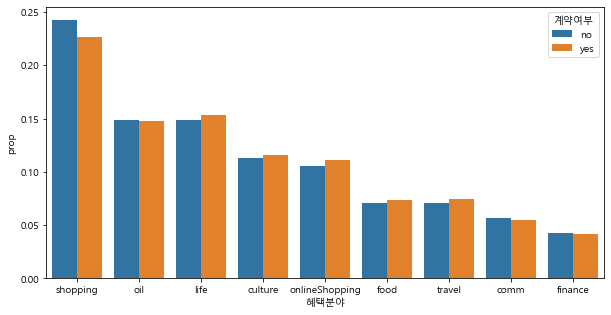

In [56]:
data, x, hue, y = df_card_tel, '혜택분야', '계약여부', 'prop'
prop_df = (data[x]
           .groupby(data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, hue=hue, data=prop_df)

In [57]:
df_card_tel['혜택분야'].groupby(df_card_tel['계약여부']).value_counts()

계약여부  혜택분야          
no    shopping          8878
      oil               5446
      life              5435
      culture           4134
      onlineShopping    3864
      food              2578
      travel            2573
      comm              2083
      finance           1557
yes   shopping          1050
      life               713
      oil                686
      culture            538
      onlineShopping     516
      travel             347
      food               342
      comm               253
      finance            195
Name: 혜택분야, dtype: int64

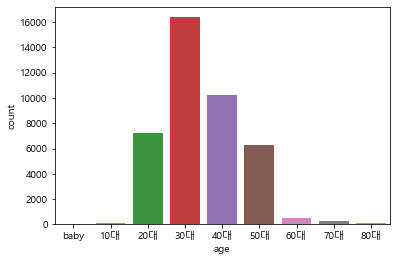

In [58]:
bins = [0,10,20,30,40,50,60,70,80,90]
df_card_tel['age'] = pd.cut(df_card_tel['연령'], bins=bins, labels = ['baby','10대','20대','30대','40대','50대','60대','70대','80대'])
def c_plot(data, col):
    data = data.sort_values(by=col, ascending=False)
    sns.countplot(col, data=data)
c_plot(df_card_tel, 'age')

Text(0.5, 1.0, '80대')

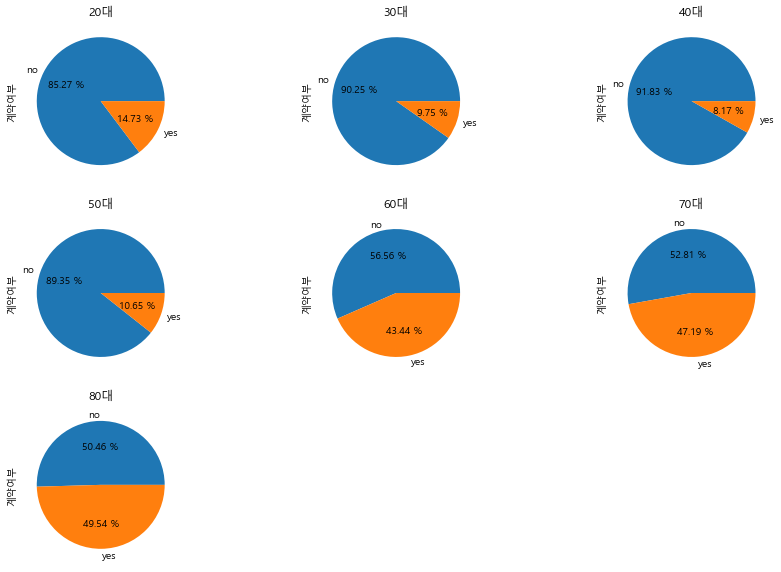

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df_card_tel[df_card_tel['age']=='20대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('20대')
plt.subplot(3,3,2)
df_card_tel[df_card_tel['age']=='30대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('30대')
plt.subplot(3,3,3)
df_card_tel[df_card_tel['age']=='40대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('40대')
plt.subplot(3,3,4)
df_card_tel[df_card_tel['age']=='50대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('50대')
plt.subplot(3,3,5)
df_card_tel[df_card_tel['age']=='60대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('60대')
plt.subplot(3,3,6)
df_card_tel[df_card_tel['age']=='70대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('70대')
plt.subplot(3,3,7)
df_card_tel[df_card_tel['age']=='80대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%')
plt.title('80대')

In [60]:
df_card_tel['혜택분야'].value_counts()

shopping          9928
life              6148
oil               6132
culture           4672
onlineShopping    4380
travel            2920
food              2920
comm              2336
finance           1752
Name: 혜택분야, dtype: int64

Text(0.5, 1.0, '20대 finance')

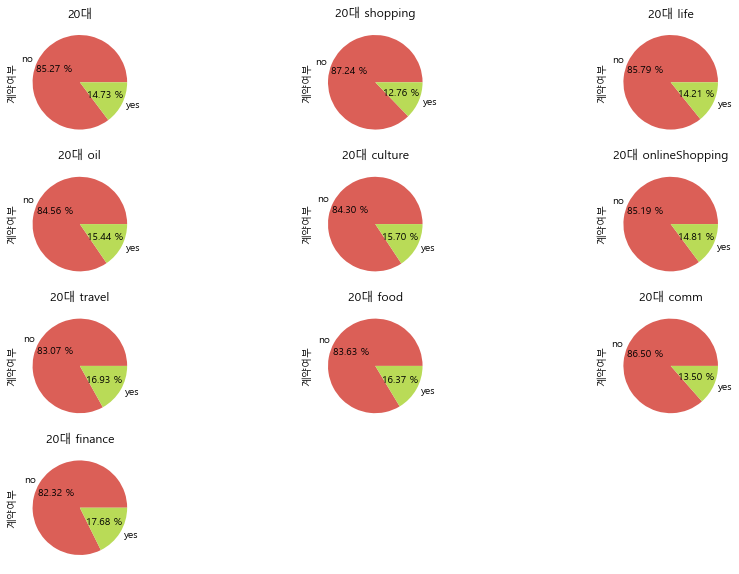

In [61]:
labels = ['Apple','Banana','Grape','Pear','Peach'] 
colors = sns.color_palette('hls',len(labels))
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='20대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 travel')
plt.subplot(4,3,8)
df_card_tel[(df_card_tel['혜택분야']=='food') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 food')
plt.subplot(4,3,9)
df_card_tel[(df_card_tel['혜택분야']=='comm') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 comm')
plt.subplot(4,3,10)
df_card_tel[(df_card_tel['혜택분야']=='finance') & (df_card_tel['age'] == '20대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('20대 finance')

Text(0.5, 1.0, '30대 finance')

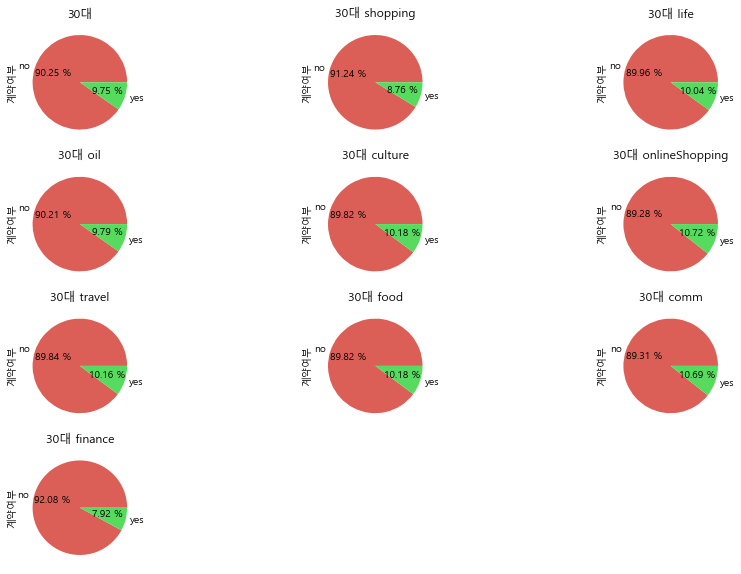

In [62]:
labels = ['Grape','Pear','Peach']
colors = sns.color_palette('hls',len(labels))
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='30대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 travel')
plt.subplot(4,3,8)
df_card_tel[(df_card_tel['혜택분야']=='food') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 food')
plt.subplot(4,3,9)
df_card_tel[(df_card_tel['혜택분야']=='comm') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 comm')
plt.subplot(4,3,10)
df_card_tel[(df_card_tel['혜택분야']=='finance') & (df_card_tel['age'] == '30대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('30대 finance')

Text(0.5, 1.0, '40대 finance')

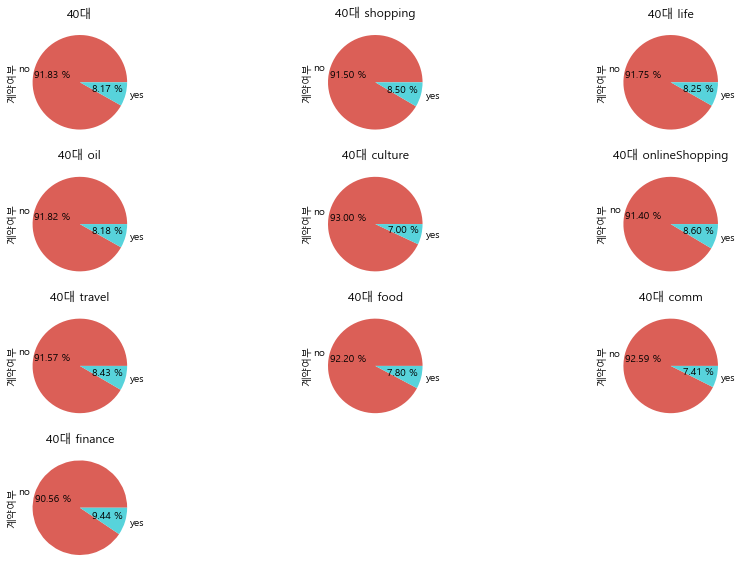

In [63]:
labels = ['Grape','Peach']
colors = sns.color_palette('hls',len(labels))
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='40대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 travel')
plt.subplot(4,3,8)
df_card_tel[(df_card_tel['혜택분야']=='food') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 food')
plt.subplot(4,3,9)
df_card_tel[(df_card_tel['혜택분야']=='comm') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 comm')
plt.subplot(4,3,10)
df_card_tel[(df_card_tel['혜택분야']=='finance') & (df_card_tel['age'] == '40대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('40대 finance')

<AxesSubplot:ylabel='계약여부'>

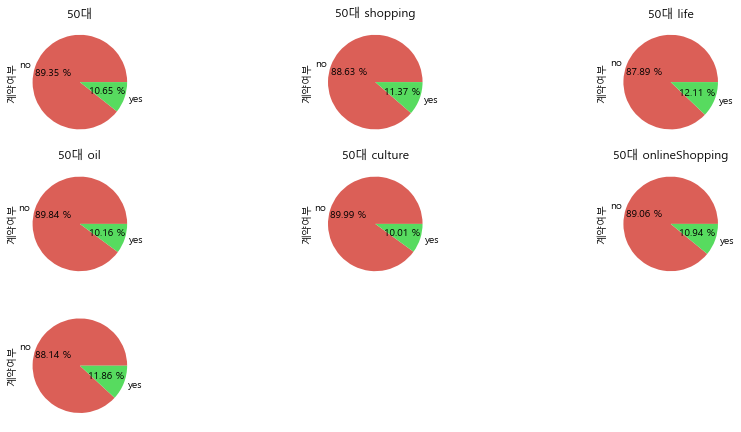

In [64]:
labels = ['Apple','Pear','Peach'] 
colors = sns.color_palette('hls',len(labels))
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='50대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('50대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '50대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)

Text(0.5, 1.0, '60대 finance')

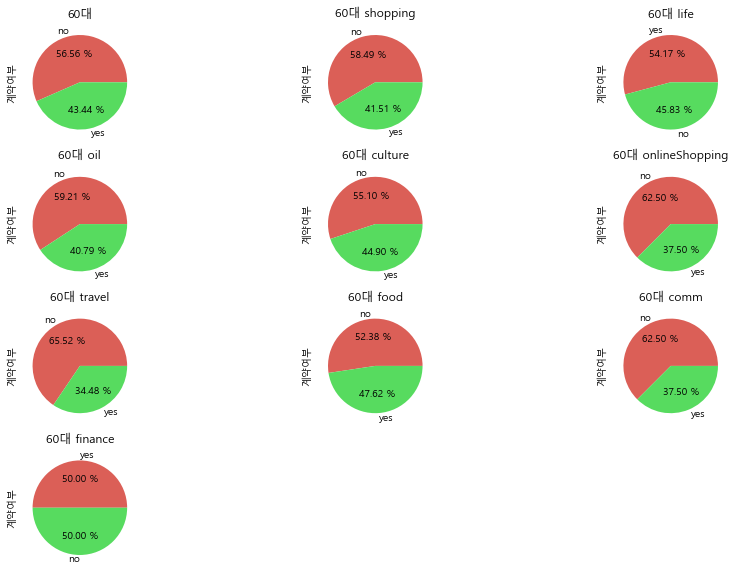

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='60대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 travel')
plt.subplot(4,3,8)
df_card_tel[(df_card_tel['혜택분야']=='food') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 food')
plt.subplot(4,3,9)
df_card_tel[(df_card_tel['혜택분야']=='comm') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 comm')
plt.subplot(4,3,10)
df_card_tel[(df_card_tel['혜택분야']=='finance') & (df_card_tel['age'] == '60대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('60대 finance')

Text(0.5, 1.0, '70대 finance')

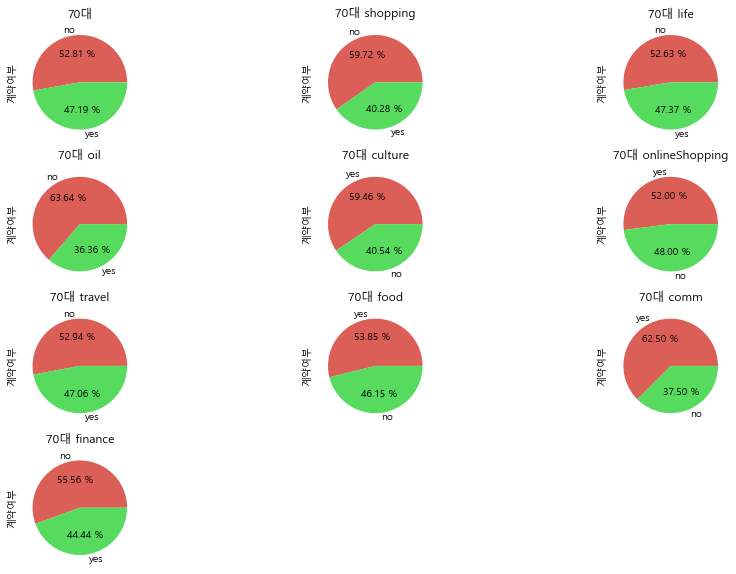

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
df_card_tel[df_card_tel['age']=='70대']['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대')
plt.subplot(4,3,2)
df_card_tel[(df_card_tel['혜택분야']=='shopping') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 shopping')
plt.subplot(4,3,3)
df_card_tel[(df_card_tel['혜택분야']=='life') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 life')
plt.subplot(4,3,4)
df_card_tel[(df_card_tel['혜택분야']=='oil') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 oil')
plt.subplot(4,3,5)
df_card_tel[(df_card_tel['혜택분야']=='culture') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 culture')
plt.subplot(4,3,6)
df_card_tel[(df_card_tel['혜택분야']=='onlineShopping') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 onlineShopping')
plt.subplot(4,3,7)
df_card_tel[(df_card_tel['혜택분야']=='travel') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 travel')
plt.subplot(4,3,8)
df_card_tel[(df_card_tel['혜택분야']=='food') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 food')
plt.subplot(4,3,9)
df_card_tel[(df_card_tel['혜택분야']=='comm') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 comm')
plt.subplot(4,3,10)
df_card_tel[(df_card_tel['혜택분야']=='finance') & (df_card_tel['age'] == '70대')]['계약여부'].value_counts().plot.pie(autopct='%.2f %%', colors=colors)
plt.title('70대 finance')

In [67]:
df_card_tel.columns

Index(['연령', '직업군', '결혼여부', '학력', '신용카드소지여부', '주택대출여부', '개인대출여부', 'contact',
       '통화시간', '연락시도횟수', 'p_days', '과거통화횟수', '계약여부', '연락일자', '카드종류', '재연락',
       '통화시간_2', 'loan', '분류', '혜택분야', '소개', '연회비', '옵션', '카드명', '가족카드여부',
       'age'],
      dtype='object')

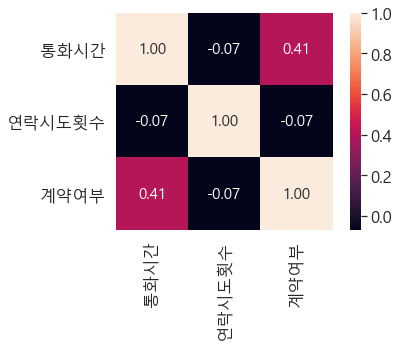

In [68]:
df_num = df_card_tel[['통화시간', '연락시도횟수', '계약여부']]
df_num['계약여부'] = np.where(df_num['계약여부'] == 'no',0,1)
cols = df_num.columns.tolist()
corr = df_num.corr(method = 'pearson') 

# 산점도 그래프 출력
sns.set(font_scale = 1.5, font='Malgun Gothic')
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size' : 15}, 
                 yticklabels = cols, xticklabels = cols )

In [69]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# 로지스틱 분석 패키지
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

In [70]:
df_card_tel.columns

Index(['연령', '직업군', '결혼여부', '학력', '신용카드소지여부', '주택대출여부', '개인대출여부', 'contact',
       '통화시간', '연락시도횟수', 'p_days', '과거통화횟수', '계약여부', '연락일자', '카드종류', '재연락',
       '통화시간_2', 'loan', '분류', '혜택분야', '소개', '연회비', '옵션', '카드명', '가족카드여부',
       'age'],
      dtype='object')

In [71]:
df_num = df_card_tel.select_dtypes(exclude=['object', 'category'])
df_obj = df_card_tel.select_dtypes(['object', 'category'])

In [72]:
for i in df_num.columns:
    df_num[i] = pd.to_numeric(df_num[i])

In [73]:
df_card_tel = pd.concat([df_num, df_obj], axis=1)

In [74]:
df_card_tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   연령        41188 non-null  int64   
 1   통화시간      41188 non-null  int64   
 2   연락시도횟수    41188 non-null  int64   
 3   과거통화횟수    41188 non-null  int64   
 4   카드종류      41188 non-null  int64   
 5   재연락       41188 non-null  int32   
 6   통화시간_2    41188 non-null  int32   
 7   loan      41188 non-null  int64   
 8   가족카드여부    41188 non-null  int64   
 9   직업군       41188 non-null  object  
 10  결혼여부      41188 non-null  object  
 11  학력        41188 non-null  object  
 12  신용카드소지여부  41188 non-null  object  
 13  주택대출여부    41188 non-null  object  
 14  개인대출여부    41188 non-null  object  
 15  contact   41188 non-null  object  
 16  p_days    41188 non-null  object  
 17  계약여부      41188 non-null  object  
 18  연락일자      41188 non-null  object  
 19  분류        41188 non-null  object  
 20  혜택분야  

In [75]:
df_train, df_test = train_test_split(df_card_tel, test_size = 0.3, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (28831, 26)
test data shape:  (12357, 26)


In [76]:
df_card_tel.drop(columns = ["연령","p_days","연락일자","통화시간_2","분류","소개","연회비","옵션","카드명","카드종류"], axis = 1, inplace = True)

In [ ]:
df_card_tel["계약여부"] = np.where(df_card_tel["계약여부"] == "no", 0, 1)

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""계약여부 ~ C(age) + C(혜택분야) + 가족카드여부 + loan + 재연락 + 과거통화횟수 +연락시도횟수 + 통화시간 + C(contact) + C(주택대출여부) + C(개인대출여부) +C(신용카드소지여부) + C(학력) + C(결혼여부) + C(직업군)""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

In [1]:
df_logistic_coef = pd.DataFrame({'Coef' : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', figsize=(30,30))
plt.xlabel('변수 중요도')

NameError: name 'pd' is not defined